In [53]:
import matplotlib.pyplot as plt
import numpy as np
import importlib
import sys
sys.path.append('../')

from modules import aperturephotometry as aph

importlib.reload(aph)

# %matplotlib qt
# %matplotlib inline

<module 'modules.aperturephotometry' from '/home/lukas/github/MasterThesisComputerScience/TPF_video_prediction/demos/../modules/aperturephotometry.py'>

In [54]:
#instantiate
APT = aph.Aperture(
    size=(50,60),
    position=np.array([-10,-5]),
    npixels=1,
    outside=0.0,
    # outside=np.nan, #use for missing values outside of aperture
    verbose=1,
)

#define apertures
poly_coeffs = [-0.015, 0.16, 0, 10]     #coefficients to define aperture falloff
apertures = [
    dict(func=APT.lp_aperture,       radius=10,  p=1,   poly_coeffs=None),
    dict(func=APT.lp_aperture,       radius=10,  p=1.5, poly_coeffs=None),
    dict(func=APT.lp_aperture,       radius=10,  p=1.5, poly_coeffs=poly_coeffs),
    dict(func=APT.lp_aperture,       radius=10,  p=2,   poly_coeffs=[0,1]),
    dict(func=APT.lp_aperture,       radius=10,  p=2,   poly_coeffs=[-0.015, 0.16, 0, 10]),
    dict(func=APT.lp_aperture,       radius=10,  p=np.inf),
    dict(func=APT.rect_aperture,     width=10,   height=20),
    dict(func=APT.gauss_aperture,    radius=10,  p=0,       covariance=np.array([[10,-13],[-13,50]]), lp=False),
    dict(func=APT.gauss_aperture,    radius=10,  p=np.inf,  covariance=5, lp=False),
    dict(func=APT.gauss_aperture,    radius=10,  p=1,       covariance=5, lp=True),
    dict(func=APT.lorentz_aperture,  fwhm=np.array([20,30]),radius=np.inf,  p=0),
    dict(func=APT.lorentz_aperture,  fwhm=10,   radius=10,  p=np.inf),
]


### Default Utilization: Standard Apertures
- `radius_inner = 0.0`
- `width_inner = 0.0`
- `height_inner = 0.0`

/home/lukas/github/MasterThesisComputerScience/TPF_video_prediction/demos/../modules/aperturephotometry.py:1076: UserWarning: The following kwargs were not used by contour: 'color'
  - overrides `self.verbose`


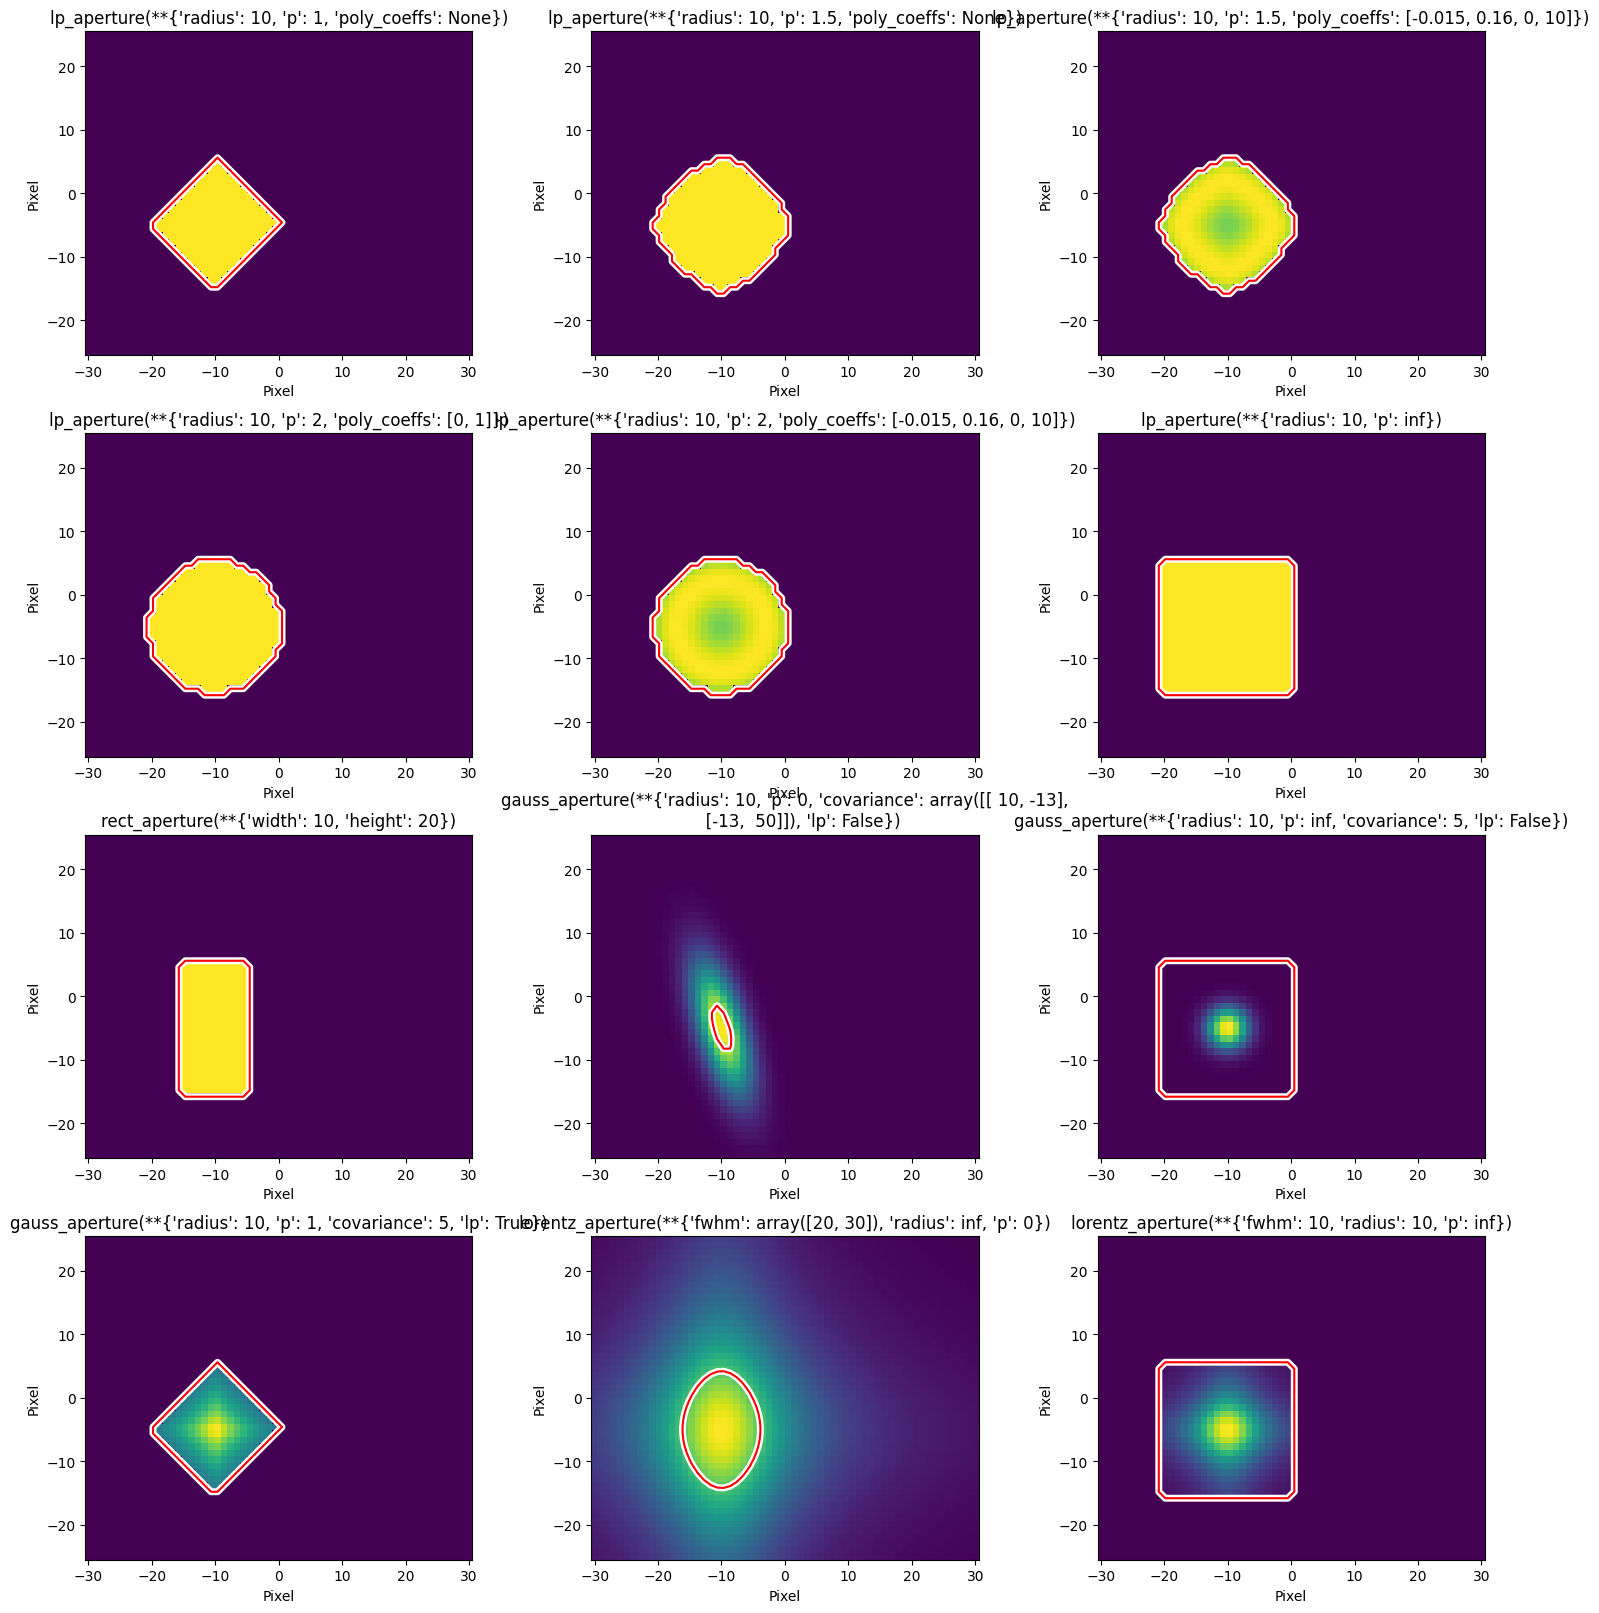

In [55]:
#plotting
ncols = 3
nrows = int(np.ceil(len(apertures)/ncols))
fig, axes = plt.subplots(nrows, ncols, figsize=(16,16))
for idx, params in enumerate(apertures):
    
    #generate aperture
    func = params.pop('func')
    aperture = func(**params)
    
    #plot
    title = f'{func.__name__}(**{params})'
    ax = axes.flatten()[idx]
    ax.set_title(title)
    fig, axs = APT.plot_result(
        aperture, ax=ax,
        pcolormesh_kwargs=dict(cmap='viridis'),
        contour_kwargs=dict(color='r', levels=0)
    )
    #remove color bar
    axs[-1].remove()

    #add func back into dict
    params['func'] = func

fig.tight_layout()

plt.show()


### Sky-Ring Generation
- `radius_inner != 0.0`
- `width_inner != 0.0`
- `height_inner != 0.0`

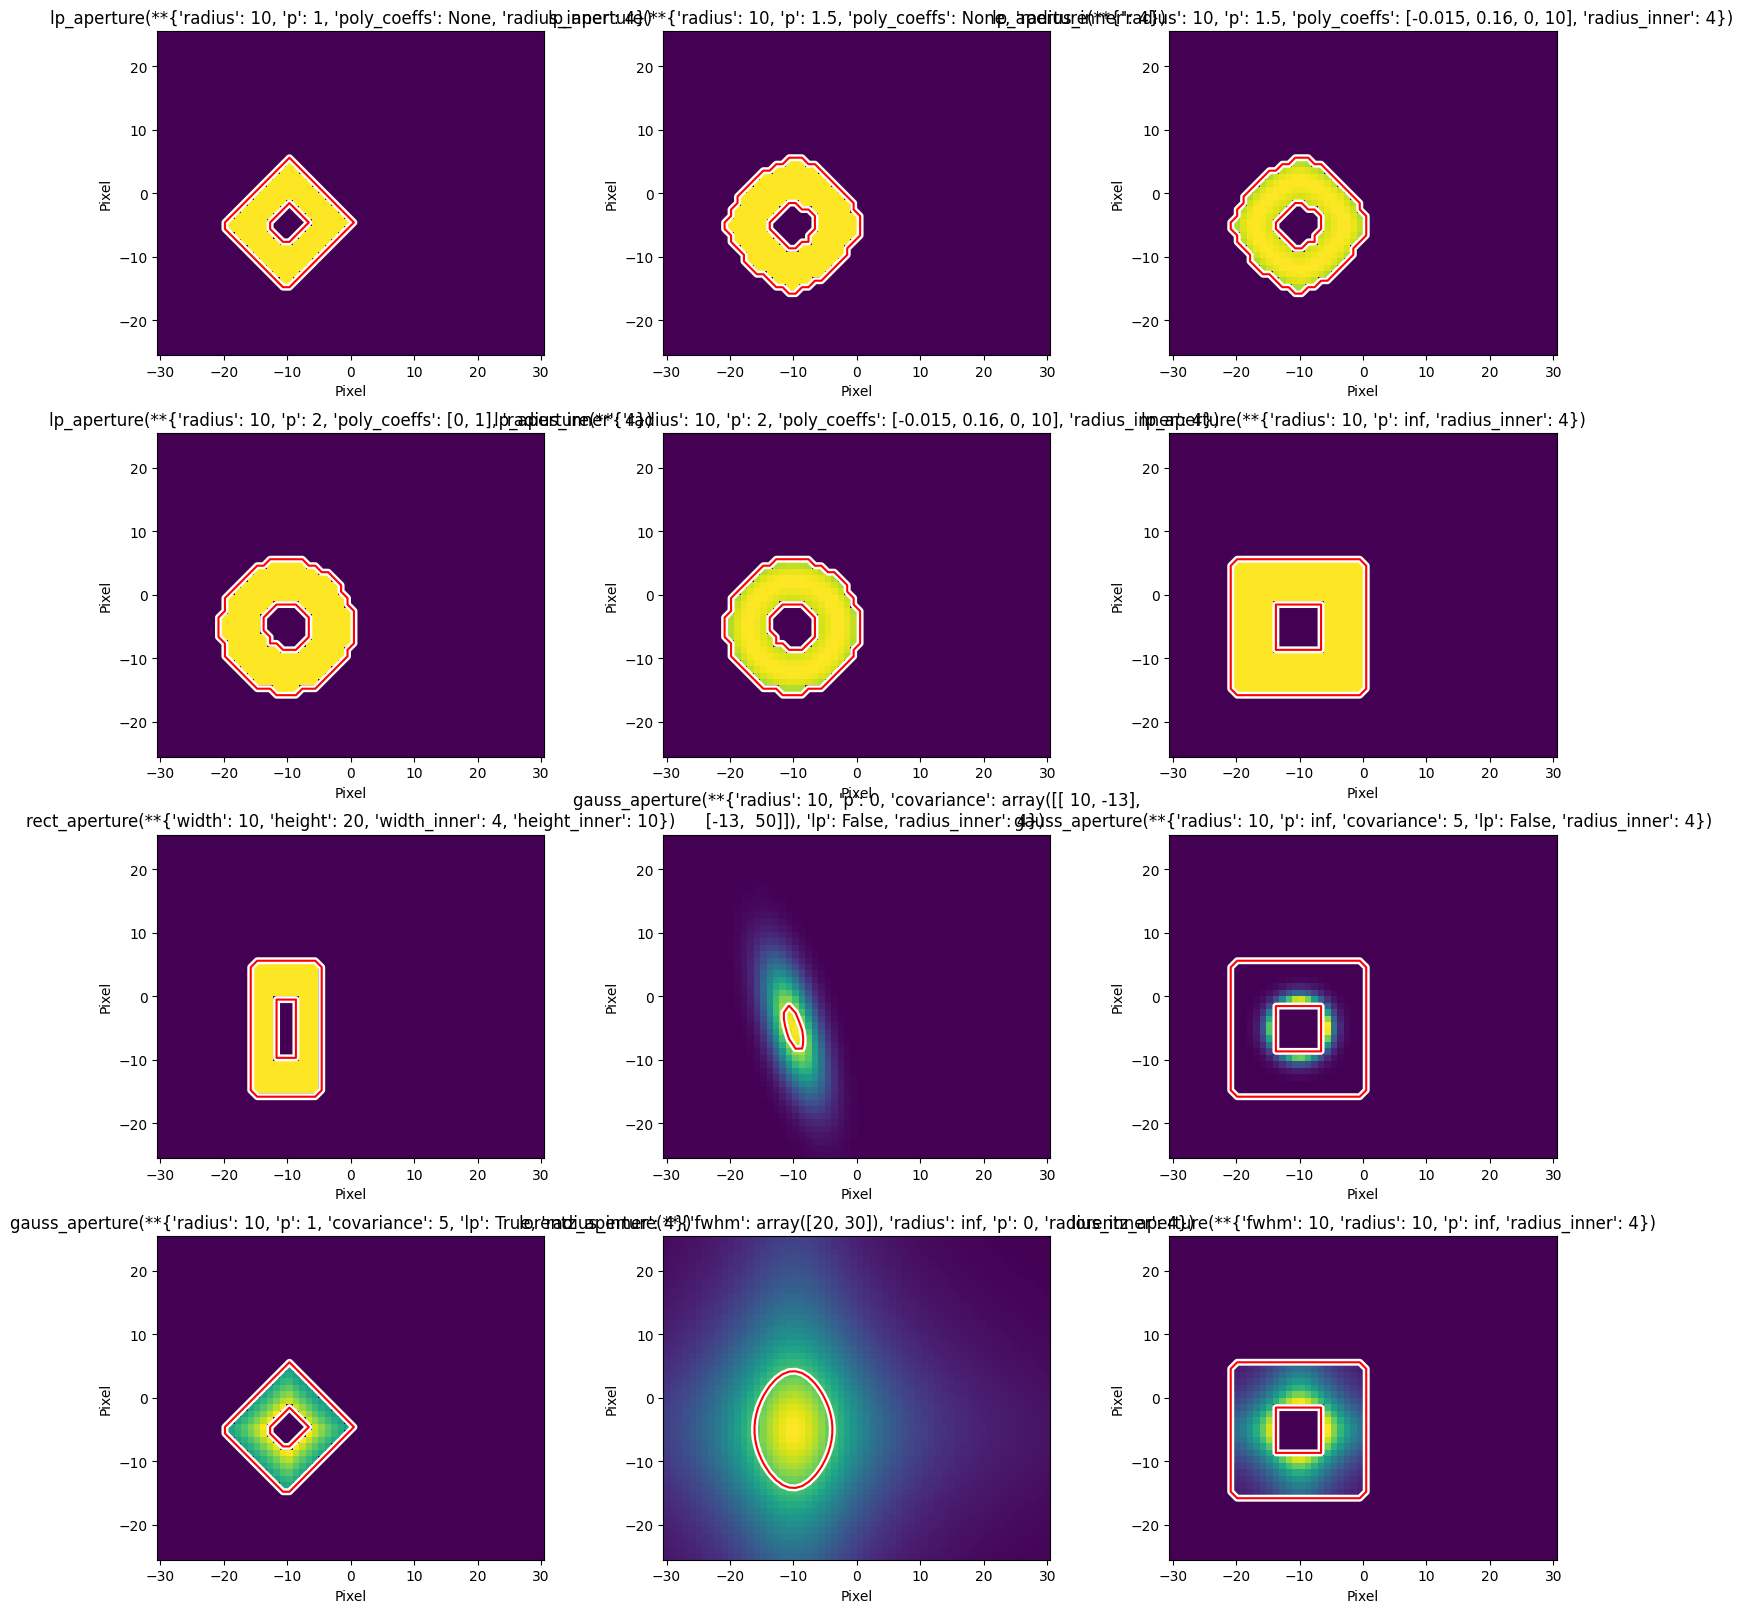

In [56]:
#add inner sky ring bounds
for i in range(len(apertures)):
    if apertures[i]['func'].__name__ == 'rect_aperture':
        apertures[i]['width_inner'] = 4
        apertures[i]['height_inner'] = 10
    else:
        apertures[i]['radius_inner'] = 4

#plotting
ncols = 3
nrows = int(np.ceil(len(apertures)/ncols))
fig, axes = plt.subplots(nrows, ncols, figsize=(16,16))
for idx, params in enumerate(apertures):
    
    #generate aperture
    func = params.pop('func')
    aperture = func(**params)
    
    #plot
    title = f'{func.__name__}(**{params})'
    ax = axes.flatten()[idx]
    ax.set_title(title)
    fig, axs = APT.plot_result(
        aperture, ax=ax,
        pcolormesh_kwargs=dict(cmap='viridis'),
        contour_kwargs=dict(color='r', levels=0)
    )
    #remove color bar
    axs[-1].remove()

fig.tight_layout()

plt.show()
